In [116]:
# Data Definition
import numpy as np
import pandas as pd

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Training Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [117]:
# Reading the CSV file
df = pd.read_csv('D:\ML\Machinefailure.csv')

In [118]:
# Prinitng out the 1st 15 cloumns just to check the rows and columns are structured well.
df.head(15)


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0
9,2800,0,3,3,7,0,39,3,1,0


In [119]:
###EDA(Exploratory Data Analysis)###

# Checking for the basic information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None


In [120]:
# Printing all the column names in new line using join method.
print("\n".join(df.columns))

footfall
tempMode
AQ
USS
CS
VOC
RP
IP
Temperature
fail


In [121]:
# Printing the data types of all the columns
print(df.dtypes)  

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object


In [122]:
# Checking if there are any null values in the dataset
print(df.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [123]:
# Displaying statistical summary of the dataset features.
print(df.describe())

          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.0

In [124]:
#To check whether there are any categorical feature present
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

[]


In [125]:
# Data Correlation: Relationship between each columns
df.corr()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
tempMode,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
AQ,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
USS,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
CS,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
VOC,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
RP,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
IP,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
Temperature,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


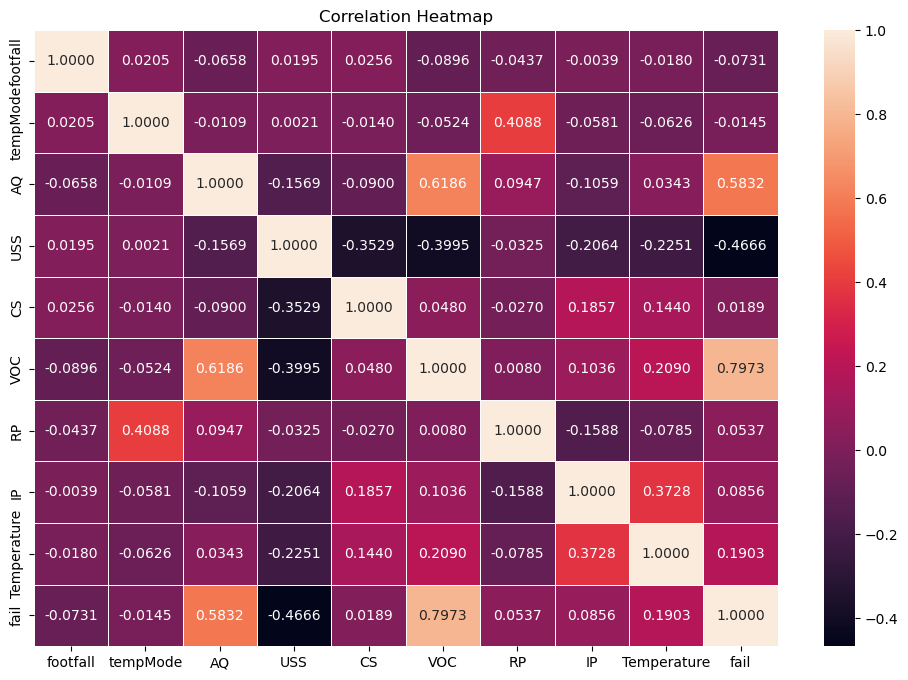

In [126]:
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, linewidth=0.5, linecolor = "white", fmt = ".4f", ax = ax)
plt.title('Correlation Heatmap')
plt.show()

In [127]:
#Select the numeriacl data types,Converts the column names to a list.
num_ft = df.select_dtypes(include=['number']).columns.tolist()
print(num_ft)

['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']


In [128]:
#Prinitng count no. of all the discrete values in each column
for feature in df.columns:
    print(f"{feature} has {len(df[feature].unique())} unique values")

footfall has 99 unique values
tempMode has 8 unique values
AQ has 7 unique values
USS has 7 unique values
CS has 7 unique values
VOC has 7 unique values
RP has 71 unique values
IP has 7 unique values
Temperature has 24 unique values
fail has 2 unique values


In [129]:
#Checking for the count of failures occured in the dataset
print(df['fail'].value_counts())

fail
0    551
1    393
Name: count, dtype: int64


In [130]:
# Initializing lists for continuous and discrete features
continuous_features = []
discrete_features = []

# Categorize each numerical feature as continuous or discrete
for feature in num_ft:
    unique_values = df[feature].unique()
    
    # If the number of unique values is less than or equal to 10, it is considered discrete
    if len(unique_values) <= 10:
        discrete_features.append(feature)
    else:
        continuous_features.append(feature)

# Output the results
print("Continuous Features:", continuous_features)
print("Discrete Features:", discrete_features)

Continuous Features: ['footfall', 'RP', 'Temperature']
Discrete Features: ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP', 'fail']


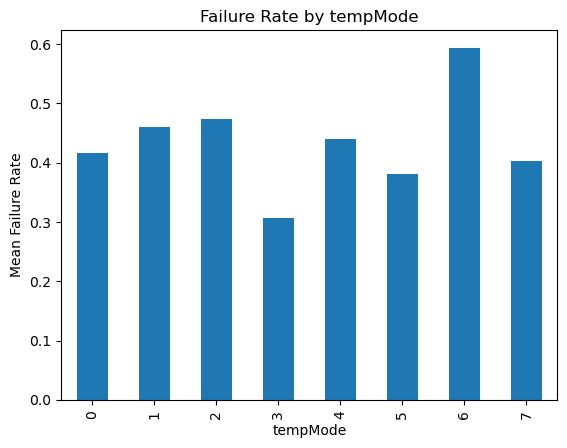

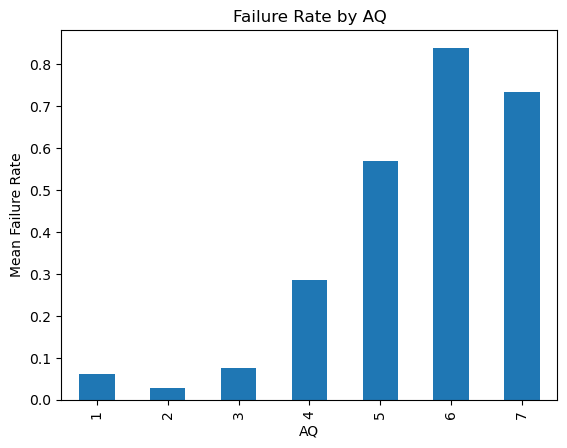

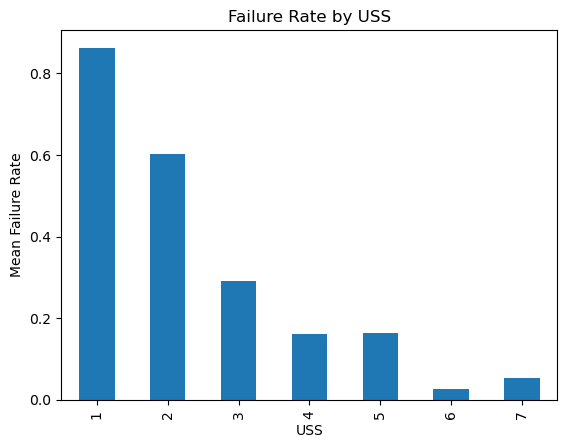

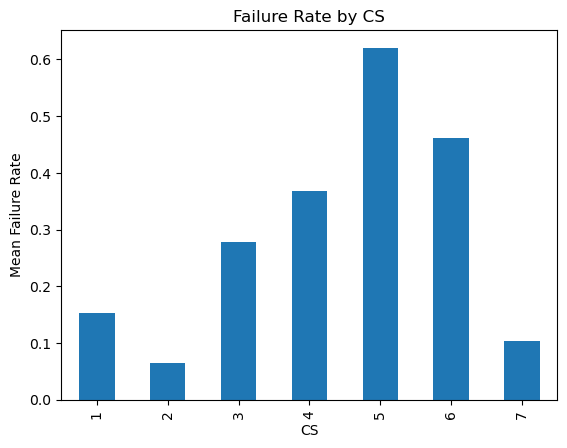

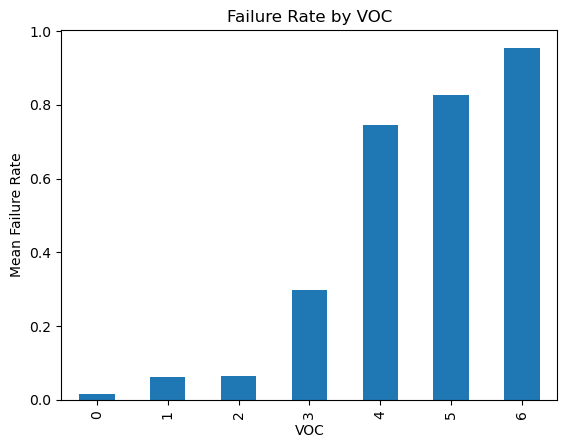

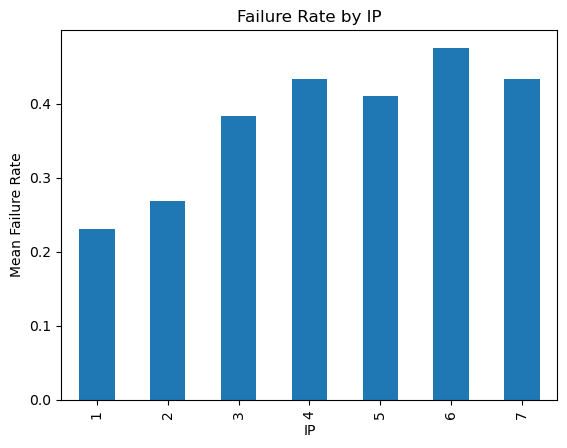

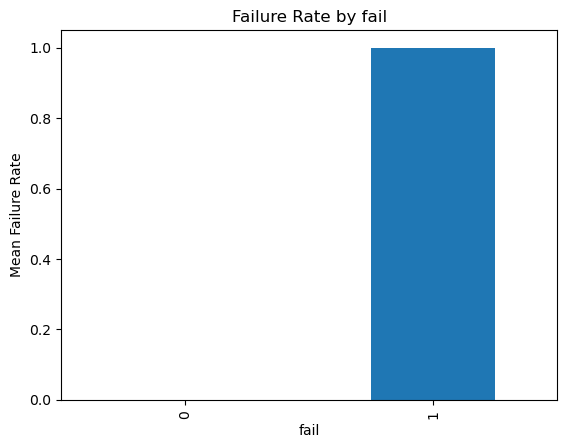

In [131]:
for feature in discrete_features:
    df.groupby(feature)['fail'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Mean Failure Rate')
    plt.title(f'Failure Rate by {feature}')
    plt.show()

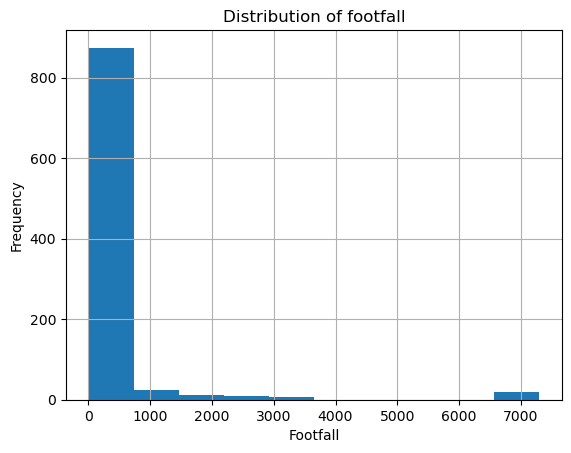

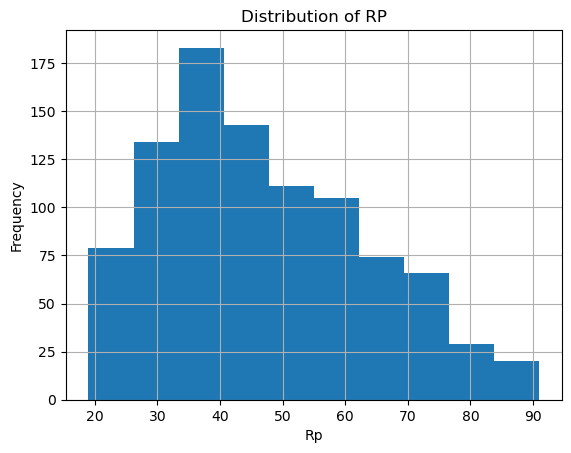

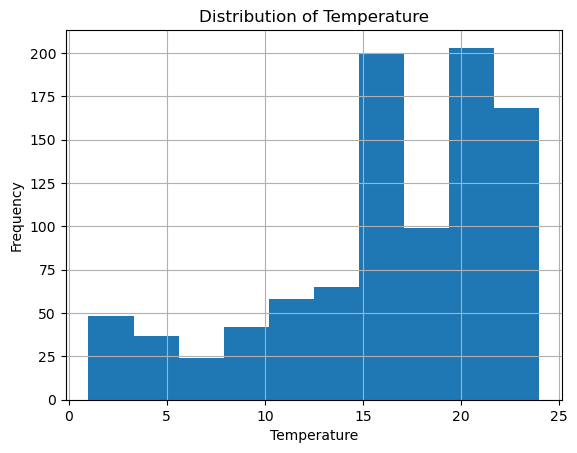

In [132]:
# Visaulizing the relationship between continuous feature and Target Variable 
# Plot the histogram for each continuous feature to visualize its distribution
for feature in continuous_features:
    # Plot the histogram
    df[feature].hist()#bins=25, edgecolor='black')
    # Set the title and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()

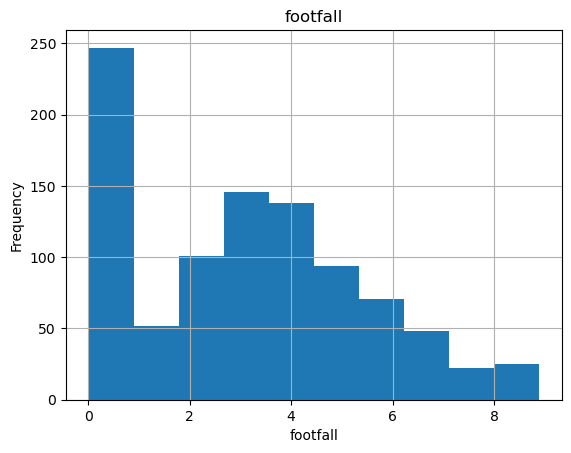

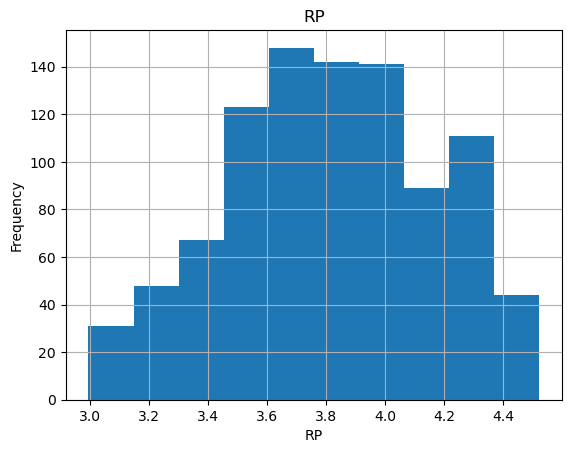

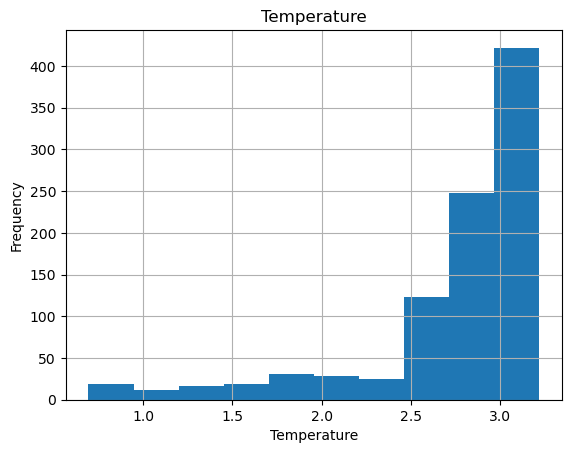

In [133]:
# Applying log transformation to each continuous feature to make distribution more Gaussian
for feature in continuous_features:
    df[feature] = np.log(df[feature] + 1)  # Adding 1 to avoid log(0)

# Plotting histograms to inspect the distribution after log transformation
for feature in continuous_features:
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

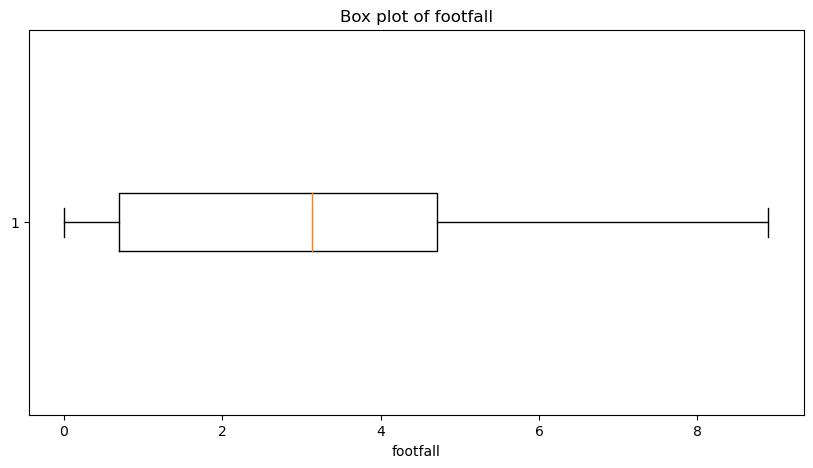

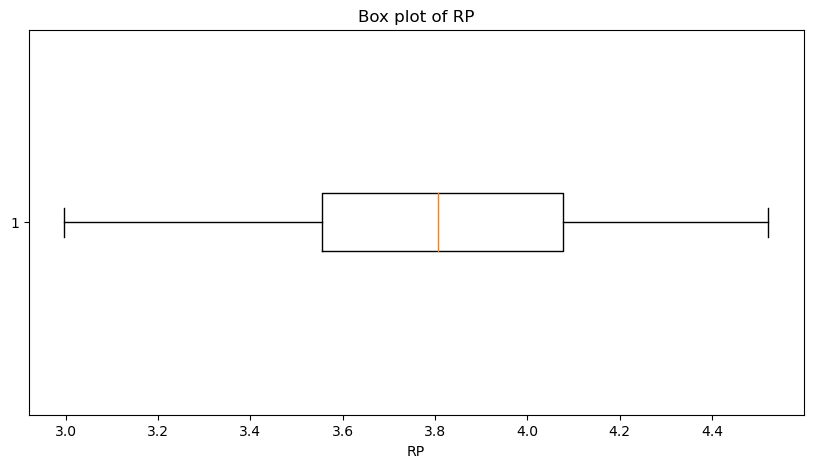

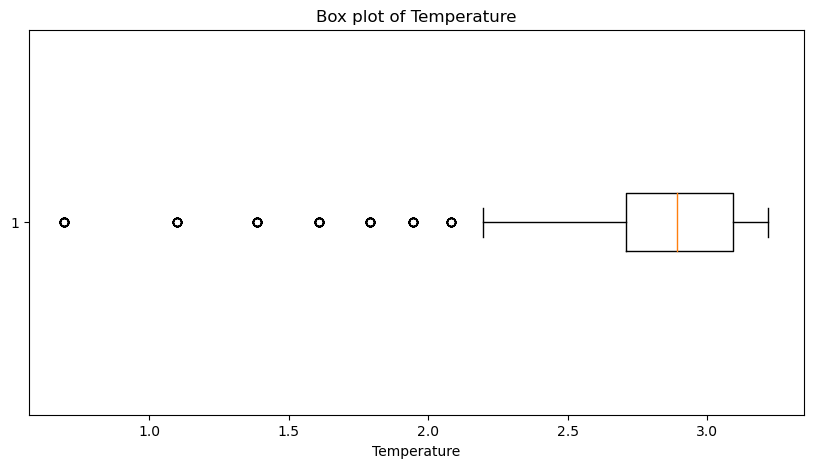

In [134]:
# Plot box plots for each continuous feature
for feature in continuous_features:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[feature], vert=False) #using Vert=False inorder to display it in horizontal for better readabilitiy
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [135]:
# Filter the rows where the temperature is less than 2.3
new_temp =df[df['Temperature']<2.3]
#display the filtered rows
print(new_temp)

     footfall  tempMode  AQ  USS  CS  VOC        RP  IP  Temperature  fail
0    0.000000         7   7    1   6    6  3.610918   3     0.693147     1
1    5.252273         1   3    3   5    1  3.044522   4     0.693147     0
2    3.465736         7   2    2   6    1  3.218876   6     0.693147     0
3    4.430817         4   3    4   5    1  3.367296   6     0.693147     0
4    6.463029         7   5    6   4    0  4.234107   6     0.693147     0
..        ...       ...  ..  ...  ..  ...       ...  ..          ...   ...
121  5.141664         2   4    2   6    6  3.091042   3     2.197225     1
122  6.463029         7   3    6   4    0  4.025352   5     2.197225     0
123  2.302585         4   6    3   6    6  3.433987   6     2.197225     1
124  0.000000         4   5    3   6    4  4.343805   7     2.197225     1
125  8.895767         5   3    4   3    3  3.610918   4     2.197225     0

[126 rows x 10 columns]


The mean temperature is  2.749858880916384


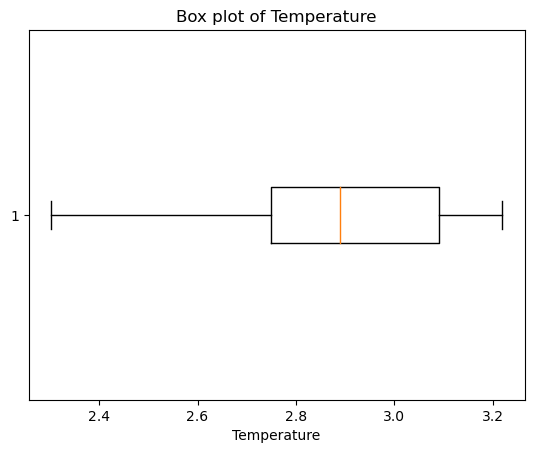

In [136]:
mean_temp=df['Temperature'].mean()
print("The mean temperature is ",mean_temp)
Outliers=df['Temperature']<2.3
df.loc[Outliers, 'Temperature'] = mean_temp
plt.boxplot(df['Temperature'],vert=False)
plt.title('Box plot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [145]:
# Extract rows where tempMode is 0
tempMode_0 = df[df['tempMode'] == 0]

# Model training with tempMode == 0
# Prepare data for model training
X_tempMode_0 = tempMode_0.drop('fail', axis=1)
Y_tempMode_0 = tempMode_0['fail']

# Split the data into training and testing sets

X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X_tempMode_0, Y_tempMode_0, test_size=0.2, random_state=0)
X_train_0.shape,X_test_0.shape

# Initialize and train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_0, Y_train_0)
Y_pred_lr_0 = lr.predict(X_test_0)
print("Logistic Regression score with tempMode == 0:", lr.score(X_test_0, Y_test_0))
#plot_confusion_matrix(Y_test_0, Y_pred_lr_0, "Logistic Regression (tempMode == 0)")

# Initializing and train Random Forest model
forest = RandomForestClassifier(n_estimators=3000, max_depth=15, max_features='sqrt')
forest.fit(X_train_0, Y_train_0)
Y_pred_forest_0 = forest.predict(X_test_0)
print("Random Forest score with tempMode == 0:", forest.score(X_test_0, Y_test_0))
#plot_confusion_matrix(Y_test_0, Y_pred_forest_0, "Random Forest (tempMode == 0)")

# Initializing and train Support Vector Classifier model
cla = SVC(kernel='linear')
cla.fit(X_train_0, Y_train_0)
Y_pred_svc_0 = cla.predict(X_test_0)
print("SVC score with tempMode == 0:", cla.score(X_test_0, Y_test_0))


# Model training with tempMode != 0
df_tempMode_not_0 = df[df['tempMode'] != 0]

# Prepare data for model training
X_tempMode_not_0 = df_tempMode_not_0.drop('fail', axis=1)
Y_tempMode_not_0 = df_tempMode_not_0['fail']

# Split the data into training and testing sets
X_train_not_0, X_test_not_0, Y_train_not_0, Y_test_not_0 = train_test_split(X_tempMode_not_0, Y_tempMode_not_0, test_size=0.2, random_state=0)

# Initializing and train Logistic Regression model
lr.fit(X_train_not_0, Y_train_not_0)
print("Logistic Regression score with tempMode != 0:", lr.score(X_test_not_0, Y_test_not_0))

# Initialize and train Random Forest model
forest = RandomForestClassifier(n_estimators=3000, max_depth=15, max_features='sqrt')
forest.fit(X_train_not_0, Y_train_not_0)
print("Random Forest score with tempMode ! = 0:", forest.score(X_test_not_0, Y_test_not_0))


# Initialize and train Support Vector Classifier model
cla.fit(X_train_not_0, Y_train_not_0)
print("SVC score with tempMode != 0:", cla.score(X_test_not_0, Y_test_not_0))


Logistic Regression score with tempMode == 0: 0.9696969696969697
Random Forest score with tempMode == 0: 0.9090909090909091
SVC score with tempMode == 0: 0.9696969696969697
Logistic Regression score with tempMode != 0: 0.9044585987261147
Random Forest score with tempMode ! = 0: 0.89171974522293
SVC score with tempMode != 0: 0.9044585987261147


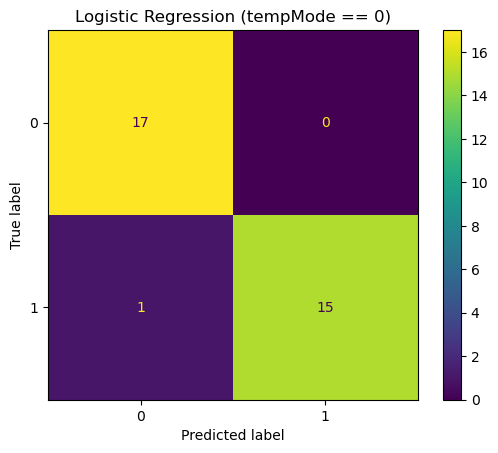

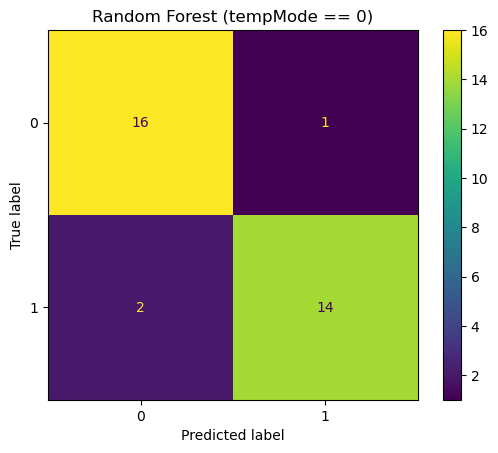

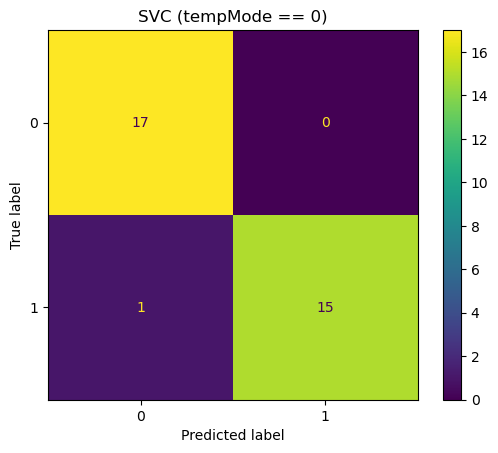

In [146]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    M = confusion_matrix(y_true, y_pred)
    show = ConfusionMatrixDisplay(confusion_matrix=M)
    show.plot()
    plt.title(title)
    plt.show()
    
plot_confusion_matrix(Y_test_0, Y_pred_lr_0, "Logistic Regression (tempMode == 0)")
plot_confusion_matrix(Y_test_0, Y_pred_forest_0, "Random Forest (tempMode == 0)")
plot_confusion_matrix(Y_test_0, Y_pred_svc_0, "SVC (tempMode == 0)")


In [147]:
#####without splitting the tempMode feature into 0 and not 0 (knowledge purpose)#####
#SVC Method without splitting the tempMode feature into 0 and not 0 (knowledge purpose)

X = df.drop(columns=['fail'])  # Features
y = df['fail']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=00)

# Initialize and train Random Forest model without splitting the feature that is just taking all the tempMode values
forest = RandomForestClassifier(n_estimators=3000, max_depth=15, max_features='sqrt')
forest.fit(X_train, y_train)
print("Random Forest score ", forest.score(X_test, y_test))

# Initialize and train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train ,y_train)
print("Logistic Regression score", lr.score(X_test, y_test))

# Creating an instance of SVC and fit the data
svc_model = SVC(kernel='linear') 
svc_model.fit(X_train, y_train)

# predictions
y_pred = svc_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Random Forest score  0.9047619047619048
Logistic Regression score 0.9153439153439153
Accuracy: 0.9206349206349206
